## Sara Ferrari, Michael Vizelman, Rachel Ward - DAV 6150 - M13 Assignment

## Introduction

In this assignment we will compare and contrast the performance of three separate feed-forward/back propogating neural networks.  We will be using a data set that describes both the physical characteristics and prices of nearly 54,000 diamonds. For this assignment, the 'cut' (of a diamond) attribute (a multi-class categorical variable) will serve as the response variable for the networks.

<ins>To accomplish our goal, we will perform the following steps:</ins>
- profiling the data set
- performing an Exploratory Data Analysis ("EDA") to identify some preliminary predictive inferences
- performing any necessary data preparation steps prior to constructing the neural networks
- performing feature selection to identify variables we believe will prove to be useful within our neural networks
- constructing and evaluating 3 feed-forward/back propogating neural networks
- comparing the performance of our neural networks
- selecting our preferred neural network
- applying the selected neural network to the testing subset
- offering conclusions


### Data Set Information
A description of the attributes represented within the data set can be found [here](https://ggplot2.tidyverse.org/reference/diamonds.html).  

<ins>The attributes in the dataset and their ranges of values are:</ins>
- **price**: price in US dollars (\\$326--\\$18,823)
- **carat**: weight of the diamond (0.2--5.01)
- **cut**: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color**: diamond color, from D (best) to J (worst)
- **clarity**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x**: length in mm (0--10.74)
- **y**: width in mm (0--58.9)
- **z**: depth in mm (0--31.8)
- **depth**: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- **table**: width of top of diamond relative to widest point (43--95)

### Domain Knowledge Development

Taken from the education section of [The Diamond Pro website](https://www.diamonds.pro/).

- **carat** - Diamond weights are stated in metric carats, abbreviated “ct.” One metric carat is two-tenths (0.2) of a gram. Large high quality diamonds are rare and valuable gems. The relationship between rarity, weight, and value can be surprising. The price of a diamond depends on a number of variables — weight is just one of them, if a 1-carat diamond is worth, say, \\$6,000 ,a 2-carat diamond of similar quality might be worth \\$15,000 and not \\$12,000.
Large diamonds are more rare than small diamonds. The more scarce something is, the more it is worth. So a larger stone doesn't just cost more. It also costs more per carat.
- **cut** - Diamond Cut is how well a diamond is cut and polished, including how well-proportioned the stone is, its depth and symmetry. Diamond Cut does not refer to the shape of the diamond, such as an Oval or Pear Shape. Cut quality directly impacts the diamond's beauty and brilliance.

Two of the most important factors in determining the quality of a diamond's cut are its depth and table. 
- **depth (total depth percentage)**: The depth of a diamond refers to its measurement from top to bottom, from the table on the top of the diamond to the culet at its base. The depth of any diamond is expressed as a percentage.
Depth percentage is calculated by dividing the diamond's total height by its average width. The deeper the diamond's depth, the higher the diamond's depth percentage. Great diamonds are all about proportion. When a diamond has the right combination of depth and table percentages, it's more capable of taking in and reflecting light. 
- **table**: A diamond's table is the flat facet on its surface — the large, flat surface facet that you can see when you look at the diamond from above. As the largest facet on a diamond, the table plays a major role in determining how brilliant the diamond is. 

## Exploratory Data Analysis 

In this section we will first read in the dataset, then rename columns as appropriate, check for missing values, and get the summary statistics of our variables. We will then check for invalid values and remove any such values from our dataset. Then, we will perform EDA on each of our variables, looking at their distributions and checking the correlations between numeric variables and chi-square test of independence scores for each of the categorical variables.  

In [1]:
#import necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read in the file
Project3_data_file = 'https://raw.githubusercontent.com/vizelman/DAV-6150/master/Project3_Data.csv'
diamonds = pd.read_csv(Project3_data_file)

#check results
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
#check df shape
diamonds.shape

(53940, 10)

The shape of the data frame indicates the data was read in as expected, we have 10 variables and 53,940 observations. 

We will now change the names of some variables to more meaningful names, then look at summary statistics of the variables, and check for missing values in the variables.

In [3]:
#rename some of the variables 
diamonds.rename(columns = {'depth': 'total_depth_percentage',
                           'x':'length_mm',
                           'y':'width_mm',
                           'z':'depth_mm'}, inplace = True)

#change order of the columns with the target variable last
diamonds = diamonds[['carat', 'length_mm', 'width_mm', 'depth_mm', 
                     'total_depth_percentage', 'table', 'price', 'color', 'clarity', 'cut']]

#check results
diamonds.head()

,carat,length_mm,width_mm,depth_mm,total_depth_percentage,table,price,color,clarity,cut
0,0.23,3.95,3.98,2.43,61.5,55.0,326,E,SI2,Ideal
1,0.21,3.89,3.84,2.31,59.8,61.0,326,E,SI1,Premium
2,0.23,4.05,4.07,2.31,56.9,65.0,327,E,VS1,Good
3,0.29,4.20,4.23,2.63,62.4,58.0,334,I,VS2,Premium
4,0.31,4.34,4.35,2.75,63.3,58.0,335,J,SI2,Good


In [4]:
#get summary statistics for each column
diamonds.describe()

,carat,length_mm,width_mm,depth_mm,total_depth_percentage,table,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,5.731157,5.734526,3.538734,61.749405,57.457184,3932.799722
std,0.474011,1.121761,1.142135,0.705699,1.432621,2.234491,3989.439738
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000
25%,0.400000,4.710000,4.720000,2.910000,61.000000,56.000000,950.000000
50%,0.700000,5.700000,5.710000,3.530000,61.800000,57.000000,2401.000000
75%,1.040000,6.540000,6.540000,4.040000,62.500000,59.000000,5324.250000
max,5.010000,10.740000,58.900000,31.800000,79.000000,95.000000,18823.000000


From the above we see that there are diamonds with length, width, and depth measurements of zero. However, the minimum carat value is 0.2. This does not make sense, as you cannot have a diamond with measurements of zero. 

Additionally, we see that the maximum width is almost 60mm, this also does not make any sense since the maximum carat weight of a diamond in our sample is 5. Per [our research](https://www.diamonds.pro/education/carat-weight/), a diamond with 5 carat weight should be approximately 11mm in width. 

Furthermore, for similar reasons, we believe a depth of 31.8mm might also be invalid. 

We will now take a closer look at these observations.  

In [5]:
#check for possibly invalid observations - diamonds with zero measurements
zero_dimensions = diamonds[((diamonds['length_mm'] == 0) | (diamonds['width_mm'] == 0) | (diamonds['depth_mm'] == 0))]
#check results
zero_dimensions

,carat,length_mm,width_mm,depth_mm,total_depth_percentage,table,price,color,clarity,cut
2207,1.00,6.55,6.48,0.0,59.1,59.0,3142,G,SI2,Premium
2314,1.01,6.66,6.60,0.0,58.1,59.0,3167,H,I1,Premium
4791,1.10,6.50,6.47,0.0,63.0,59.0,3696,G,SI2,Premium
5471,1.01,6.50,6.47,0.0,59.2,58.0,3837,F,SI2,Premium
10167,1.50,7.15,7.04,0.0,64.0,61.0,4731,G,I1,Good
11182,1.07,0.00,6.62,0.0,61.6,56.0,4954,F,SI2,Ideal
11963,1.00,0.00,0.00,0.0,63.3,53.0,5139,H,VS2,Very Good
13601,1.15,6.88,6.83,0.0,59.2,56.0,5564,G,VS2,Ideal
15951,1.14,0.00,0.00,0.0,57.5,67.0,6381,G,VS1,Fair
24394,2.18,8.49,8.45,0.0,59.4,61.0,12631,H,SI2,Premium


In [6]:
#check for possibly invalid observations - diamonds with width above 11 mm or depth above 11 mm
odd_dimensions = diamonds[((diamonds['width_mm'] > 11) | (diamonds['depth_mm'] >11))]
#check results
odd_dimensions

,carat,length_mm,width_mm,depth_mm,total_depth_percentage,table,price,color,clarity,cut
24067,2.00,8.09,58.90,8.06,58.9,57.0,12210,H,SI2,Premium
48410,0.51,5.12,5.15,31.80,61.8,54.7,1970,E,VS1,Very Good
49189,0.51,5.15,31.80,5.12,61.8,55.0,2075,E,VS1,Ideal


From the above, we see that there are 20 observations in the sample that have at least one zero size measure. These observations are clearly invalid, there is no such thing as a diamond with zero length or width or depth. 

Furthermore, we see there are 3 observations where either the width or depth is greater than 11mm. Looking at the observations in more detail, we believe these are also invalid for the reasons stated above.

We will now remove these observations from our sample.

In [7]:
#create new diamonds data frame
diamonds_new = diamonds.copy()

#save index of invalid observations
invalid_index = zero_dimensions.index
invalid_index2 = odd_dimensions.index

#drop invalid observations
diamonds_new.drop(invalid_index,inplace=True)
diamonds_new.drop(invalid_index2,inplace=True)

#reset the index
diamonds_new.reset_index(drop=True,inplace=True)

#check results
diamonds_new

,carat,length_mm,width_mm,depth_mm,total_depth_percentage,table,price,color,clarity,cut
0,0.23,3.95,3.98,2.43,61.5,55.0,326,E,SI2,Ideal
1,0.21,3.89,3.84,2.31,59.8,61.0,326,E,SI1,Premium
2,0.23,4.05,4.07,2.31,56.9,65.0,327,E,VS1,Good
3,0.29,4.20,4.23,2.63,62.4,58.0,334,I,VS2,Premium
4,0.31,4.34,4.35,2.75,63.3,58.0,335,J,SI2,Good
...,...,...,...,...,...,...,...,...,...,...
53912,0.72,5.75,5.76,3.50,60.8,57.0,2757,D,SI1,Ideal
53913,0.72,5.69,5.75,3.61,63.1,55.0,2757,D,SI1,Good
53914,0.70,5.66,5.68,3.56,62.8,60.0,2757,D,SI1,Very Good
53915,0.86,6.15,6.12,3.74,61.0,58.0,2757,H,SI2,Premium


We verified that the rows were properly deleted. Next we will check the calculations of the total_depth_percentage column since we were given the formula, to make sure that the original values were calculated correctly. 

In [8]:
#create new column with calculated total depth percentage
diamonds_new['calculated_total_depth_percentage'] = round((2*diamonds_new.depth_mm)/(diamonds_new.length_mm+diamonds_new.width_mm)*100,1)

#check for observations where the original value is different from the calculated value 
miscalculated_t_depth = diamonds_new[(diamonds_new['total_depth_percentage'] != diamonds_new['calculated_total_depth_percentage'])]

#check results
miscalculated_t_depth

,carat,length_mm,width_mm,depth_mm,total_depth_percentage,table,price,color,clarity,cut,calculated_total_depth_percentage
0,0.23,3.95,3.98,2.43,61.5,55.0,326,E,SI2,Ideal,61.3
96,0.70,5.71,5.76,3.40,59.4,62.0,2759,F,VS1,Good,59.3
97,0.96,6.27,5.95,4.07,66.3,62.0,2759,F,SI2,Fair,66.6
104,0.80,5.94,5.87,3.72,62.9,56.0,2760,I,VS1,Ideal,63.0
151,0.74,5.82,5.86,3.57,61.3,56.0,2769,I,SI1,Ideal,61.1
...,...,...,...,...,...,...,...,...,...,...,...
53780,0.90,6.07,6.02,3.86,63.8,56.0,2732,H,SI1,Good,63.9
53791,0.77,5.70,5.86,3.71,64.3,57.9,2734,H,VVS2,Good,64.2
53816,0.71,5.72,5.76,3.53,61.6,57.0,2738,G,SI1,Ideal,61.5
53840,1.00,6.22,6.12,4.13,66.8,56.0,2743,I,SI2,Fair,66.9


We see that there are over 3,700 rows where the given total_depth_percentage column is different from what we calculated ourselves. Given this, we feel more comfortable using our own calculated column since we can clearly explain where these numbers came from. It is more likely that a mistake was made in the calculation or rounding of total_depth_percentage rather than in one of the size measurements. We will now drop the total_depth_percentage column and move forward using our own calculated column. 

In [9]:
#drop original total_depth_percentage column
diamonds_new.drop(columns = 'total_depth_percentage', inplace=True)

We will now check the range of values in our new column to see if there are any more observations that do not make sense.  
The total_depth_percentage of a diamond should not be much lower than ~40% (based on [our research](https://www.diamonds.pro/education/diamond-depth-and-table/) the ideal total depth percentage would be between 59mm--75mm depending on the shape of the cut) otherwise it would mean the diamond is very wide and very flat which does not make much sense. The range of the original column total_depth_percentage was 43mm--79mm which is in keeping with the above. 

In [10]:
#check for new calculated_total_depth_percentage values that may indicate an invalid observation
odd_t_depth =  diamonds_new[(diamonds_new['calculated_total_depth_percentage']<40)]
#check results
odd_t_depth

,carat,length_mm,width_mm,depth_mm,table,price,color,clarity,cut,calculated_total_depth_percentage
14627,1.07,6.62,6.67,1.07,57.0,5909,F,SI1,Ideal,16.1
20685,1.53,7.43,7.50,1.53,54.0,8971,I,SI1,Ideal,20.5
21645,1.41,7.31,7.22,1.41,56.0,9752,H,VS1,Ideal,19.4


We see that there are only 3 observations where the calculated_total_depth_percentage is lower than 40% (much lower in fact). We can also see that the carat value is identical to the depth_mm value in all 3 of these observations. This leads us to believe that a data entry mistake was made in these observations and we will remove them from our sample.  

In [11]:
#save index of invalid observations
invalid_index3 = odd_t_depth.index

#drop invalid observations
diamonds_new.drop(invalid_index3,inplace=True)

#reset the index
diamonds_new.reset_index(drop=True,inplace=True)

#change order of the columns with the target variable last
diamonds_new = diamonds_new[['carat', 'length_mm', 'width_mm', 'depth_mm',
                             'calculated_total_depth_percentage', 'table', 'price',
                             'color', 'clarity', 'cut']]

#check results
diamonds_new

,carat,length_mm,width_mm,depth_mm,calculated_total_depth_percentage,table,price,color,clarity,cut
0,0.23,3.95,3.98,2.43,61.3,55.0,326,E,SI2,Ideal
1,0.21,3.89,3.84,2.31,59.8,61.0,326,E,SI1,Premium
2,0.23,4.05,4.07,2.31,56.9,65.0,327,E,VS1,Good
3,0.29,4.20,4.23,2.63,62.4,58.0,334,I,VS2,Premium
4,0.31,4.34,4.35,2.75,63.3,58.0,335,J,SI2,Good
...,...,...,...,...,...,...,...,...,...,...
53909,0.72,5.75,5.76,3.50,60.8,57.0,2757,D,SI1,Ideal
53910,0.72,5.69,5.75,3.61,63.1,55.0,2757,D,SI1,Good
53911,0.70,5.66,5.68,3.56,62.8,60.0,2757,D,SI1,Very Good
53912,0.86,6.15,6.12,3.74,61.0,58.0,2757,H,SI2,Premium


We verified that the rows were properly deleted. Next we will check for missing values in our data set.

In [12]:
#check the data set for missing (null) values
diamonds_new.isnull().sum()

carat                                0
length_mm                            0
width_mm                             0
depth_mm                             0
calculated_total_depth_percentage    0
table                                0
price                                0
color                                0
clarity                              0
cut                                  0
dtype: int64

From the above we have no missing values in our data set.

Since we have eliminated invalid observations we will not be eliminating further observations such as outliers. 

We will now look at the distributions of each of our variables. We will split this portion into numeric data for which we will plot histograms, and categorical data for which we will plot bar plots. 

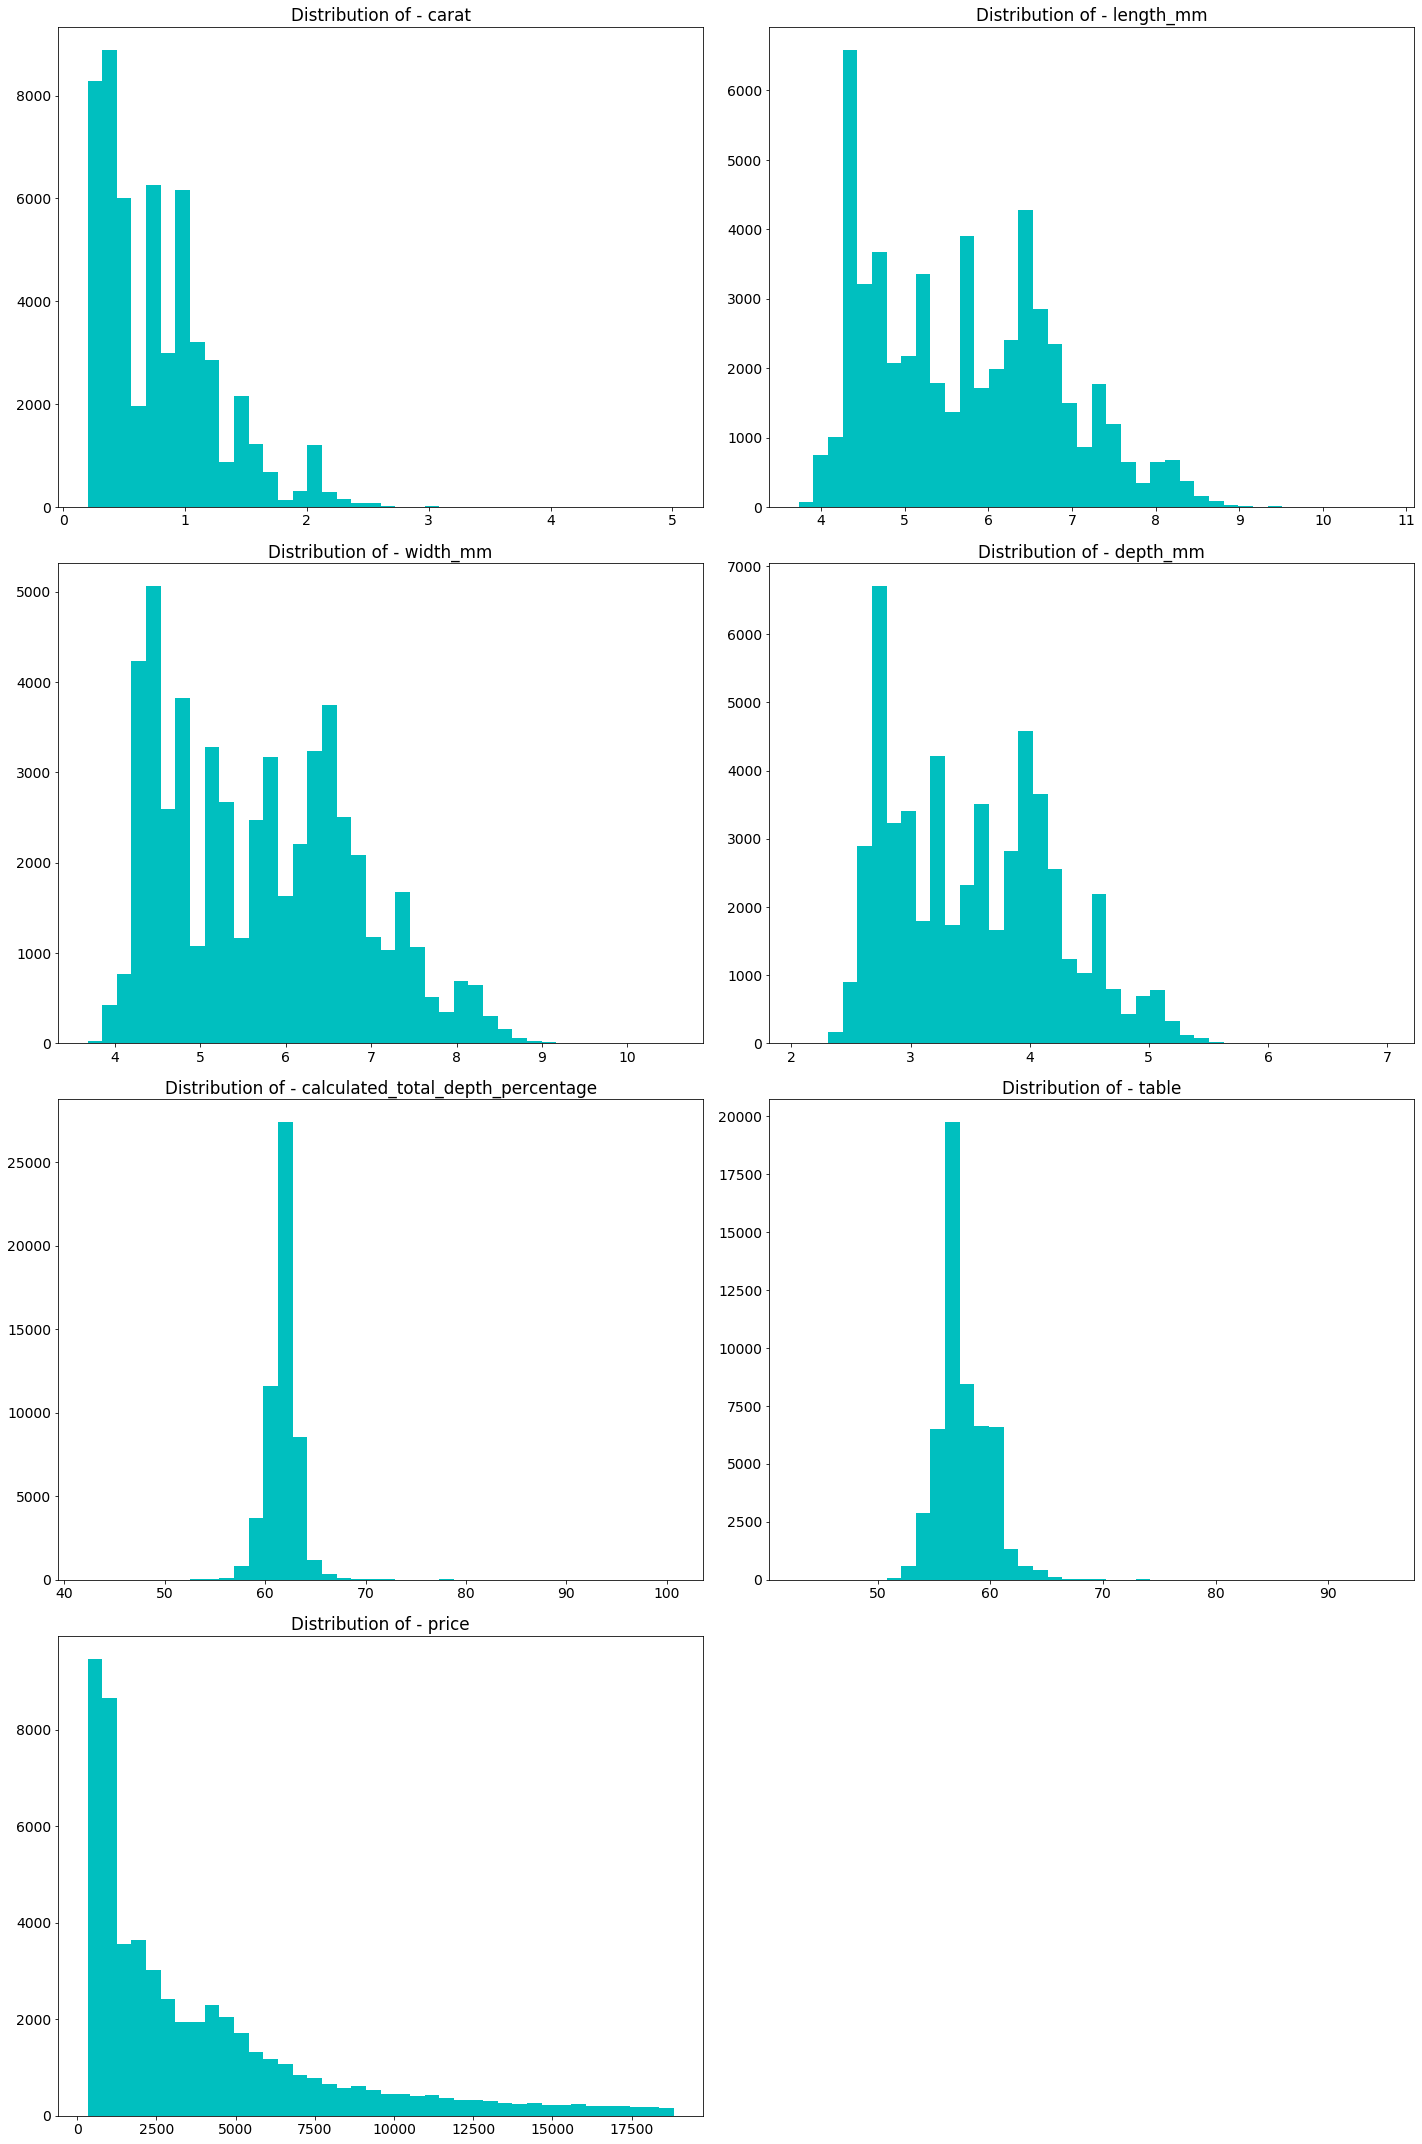

In [13]:
#set color palette for charts
sns.set_palette("muted")

#create a list of the numeric variables
diamonds_num = ['carat', 'length_mm', 'width_mm', 'depth_mm',
                'calculated_total_depth_percentage', 'table', 'price']

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,30)}) 

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1

#plot a histogram for each of our numeric variables
for k in diamonds_num :   
    plt.subplot(4,2,j) 
    plt.hist(diamonds_new[k], bins=40, color='c')
    plt.title('Distribution of - {}'.format(k))
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

From the distributions we see that the **carat** variable is skewed to the right. We expected this since lower carat diamonds tend to be cheaper and more prevalent. 

We also see that **length_mm**, **width_mm** and **depth_mm** have a multi-modal distribution. They all have approximately the same range of 0-10. 

Both **calculated_total_depth_percentage** and **table** are approximately normally distributed. 

Similar to **carat**, **price** is skewed right with a maximum of over 17,000. Again, this is as expected since there are more diamonds with lower carats and cheaper ranges than there are diamonds with higher carats and higher prices.

Now we will plot the boxplot of our numerical variables against the target variable.

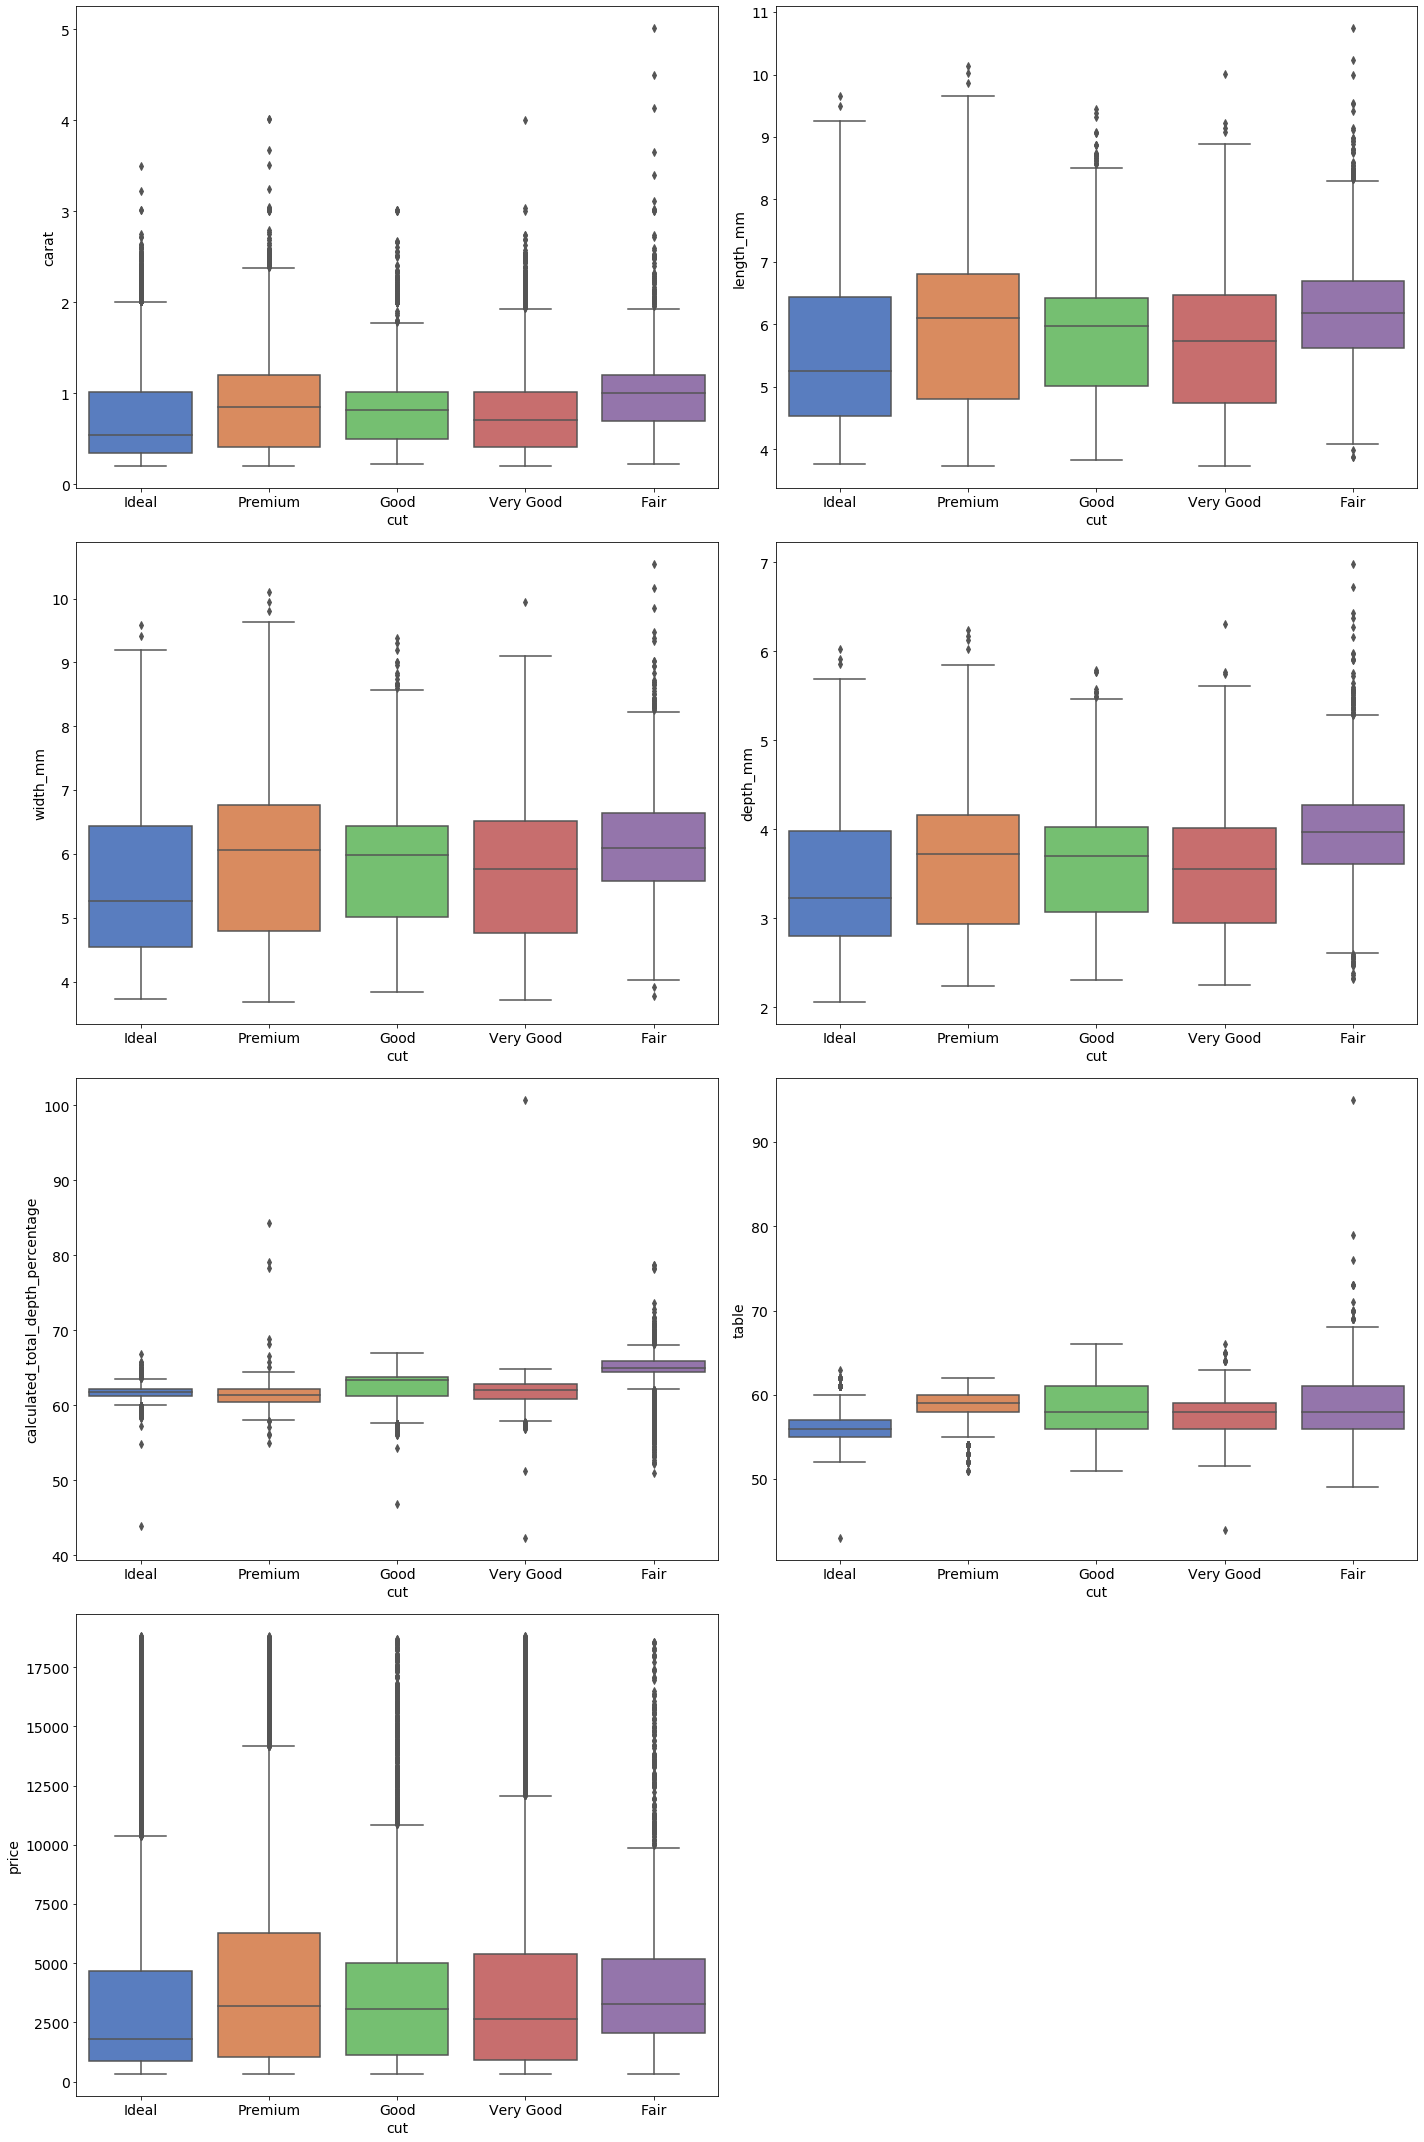

In [14]:
#use an index to identify the spot of the subplot
j=1
#plot boxplots of the distribution of each numerical variable against the target variable (cut)
for k in diamonds_num: 
    plt.subplot(4,2,j) 
    sns.boxplot(data=diamonds_new, x='cut', y=k)
    j=j+1

plt.tight_layout()
#show results    
plt.show()

The boxplots indicate that each of these variables may be a good predictor since there is a difference in where the median lies for different categories. For example, it seems that "Premium" cut diamonds have a higher median price than the other cuts of diamonds. This is slightly surprising since "Ideal" is the best cut. 

Next, we will plot a correlation matrix for our numerical variables.

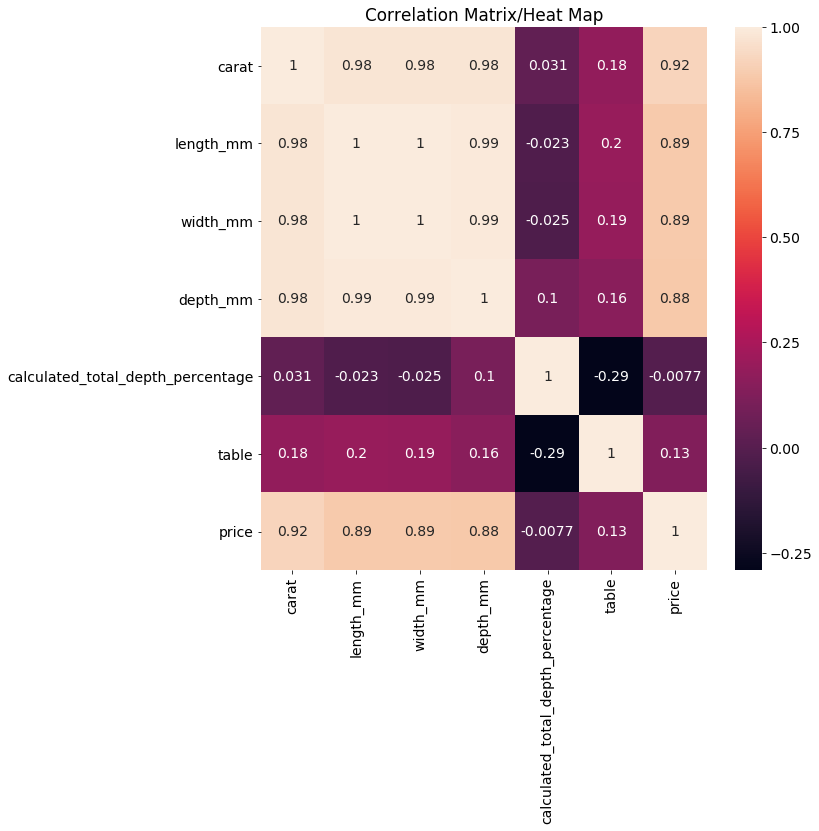

In [15]:
#get correlation matrix and plot it using seaborn

#set figure size
plt.figure(figsize=(10, 10)) 

#create a data frame with the numerical variables
diamonds_num_df = diamonds_new[diamonds_num]
corr_df = diamonds_num_df.copy()
                                        
#get correlation matrix
corrMatrix = corr_df.corr() 

#graph correlation matrix
sns.heatmap(corrMatrix, annot=True) 
plt.title('Correlation Matrix/Heat Map') 

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

We note that carat and price have an extremely high correlation. In our data preparation section we will combine those into a calculated column called price_per_carat which will encapsulate all this information. Likewise, length, width, and depth all also have extremely high correlations with each other and with price. 

Next, we will plot the distribution of our categorical variables.

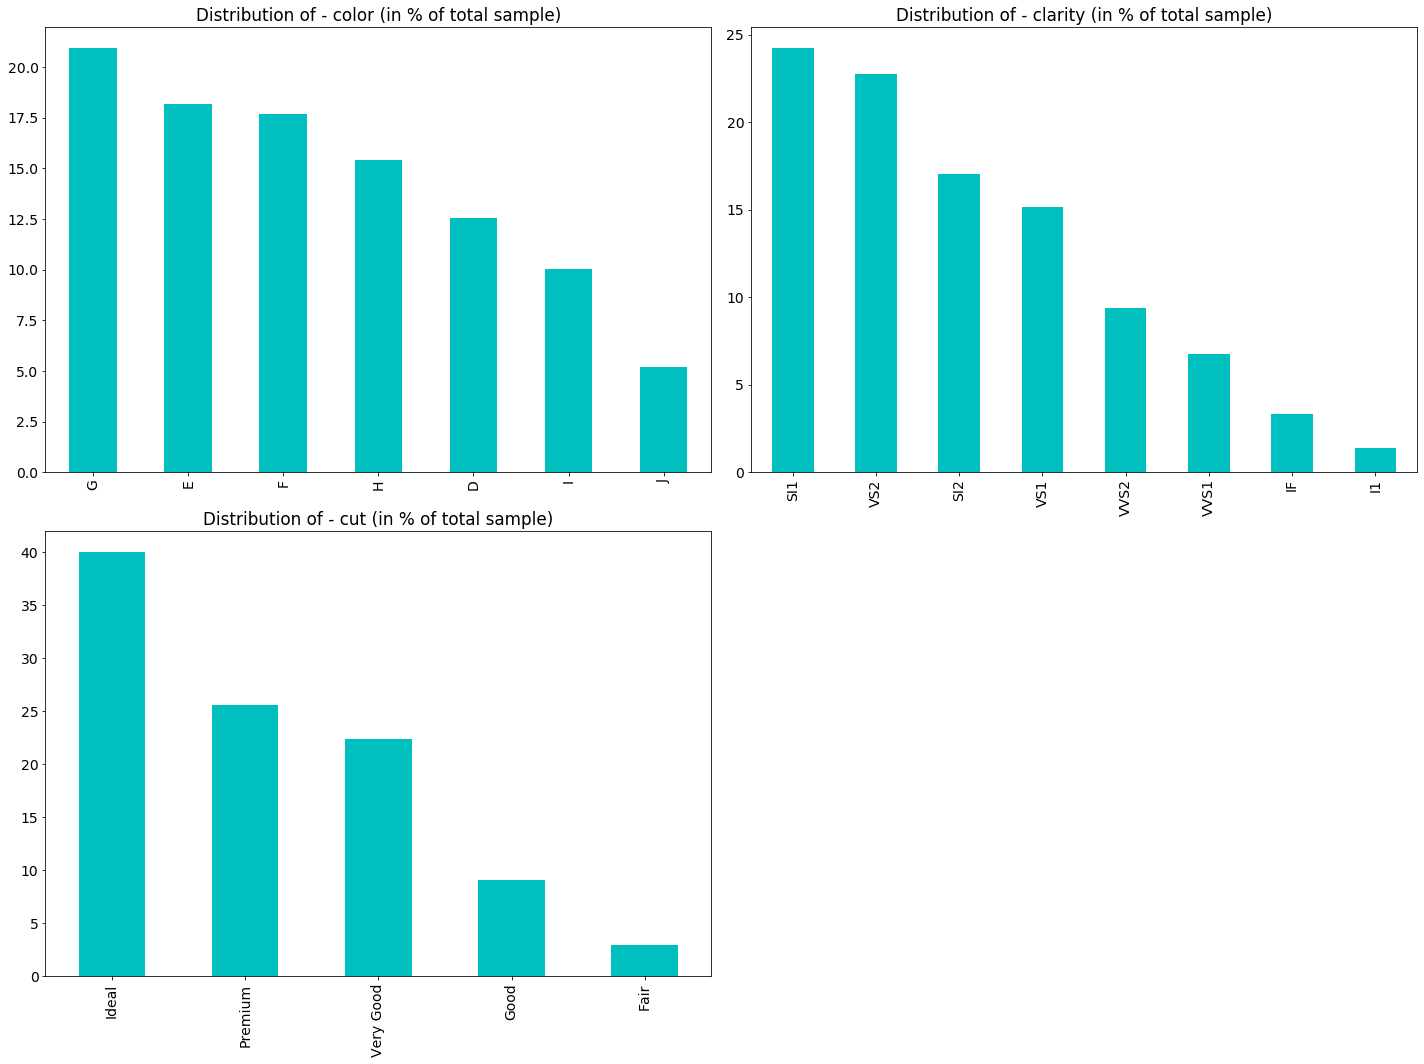

In [16]:
#create a list of the categorical variables including the target (cut)
diamonds_cat = ['color', 'clarity', 'cut']

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,15)}) 

#use an index to identify the spot of the subplot
j=1
#plot a bar chart for each categorical variable, as % of total 
for k in diamonds_cat:
    plt.subplot(2,2,j) 
    ((diamonds_new[k].value_counts()/len(diamonds_new[k]))*100).plot(kind='bar', color = 'c');
    plt.title('Distribution of - {} (in % of total sample)'.format(k))
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

From the above we see that the highest percentage of observations for color are for "G" which is close to the worst color of J. This makes sense as cheaper diamonds tend to have poorer color. 

For clarity, Sl1 had the highest frequency (which is also in keeping with the sample since it is a rather low level of clarity), and for cut, the most frequent category was an "Ideal" cut. 

Next we will plot the frequency of our target variable against the values of each categorical variable. 

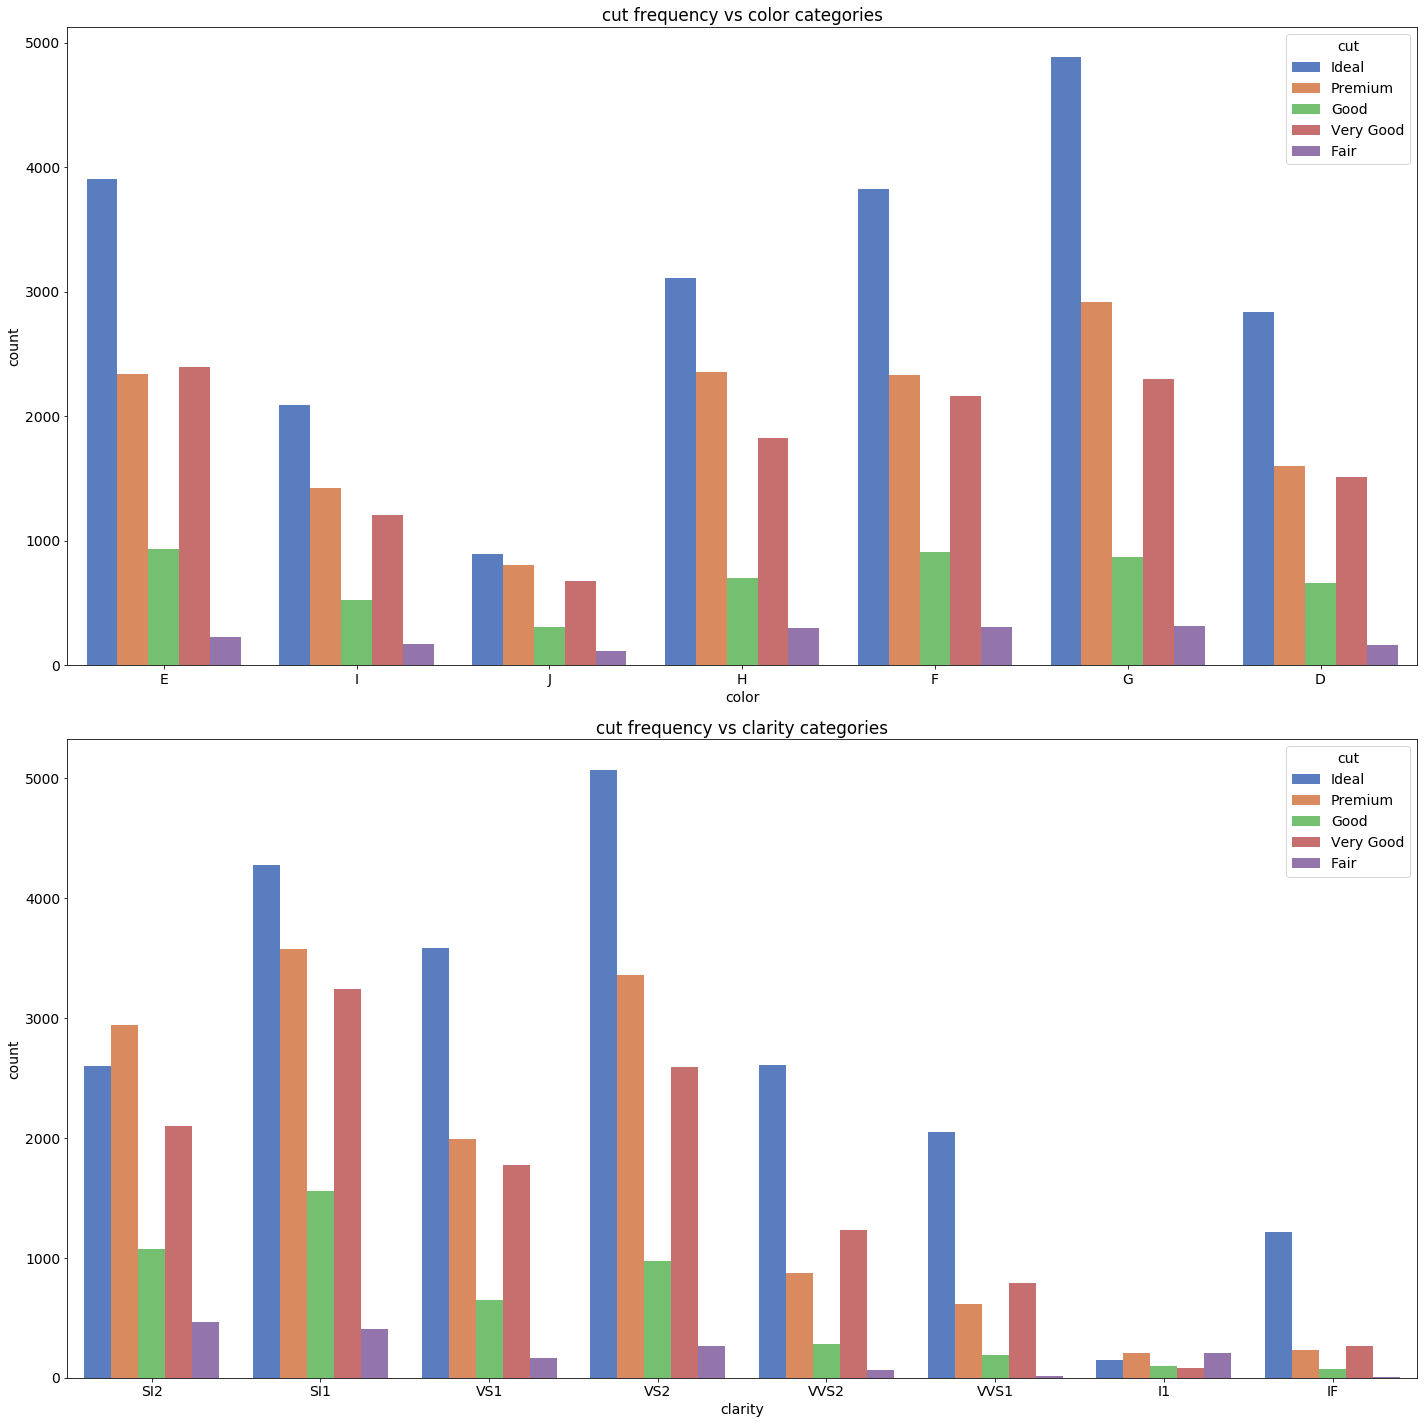

In [17]:
#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,20)}) 

#use an index to identify the spot of the subplot
j=1
#plot the frequency of our target variable (cut) vs the categories in each categorical variable 
for k in diamonds_cat[:-1]:
    plt.subplot(2,1,j) 
    sns.countplot(x=k, hue='cut' ,data=diamonds_new)
    plt.title('cut frequency vs %s categories' %k)
    j=j+1
plt.tight_layout()
#show results
plt.show()

Unfortunately we do not see any clear patterns that indicate any good predictors. 

We will now perform a chi-square test of independence on our categorical variables. 

In [18]:
#import module to perform chi-square
from scipy import stats

#create a data frame with the categorical variables
diamonds_cat_df = diamonds_new[diamonds_cat]

#create list to save chi-square test results
chi_sq=[]

#iterate over the categorical explanatory variables
for i in range(len(diamonds_cat[:-1])):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(diamonds_cat_df.cut, diamonds_cat_df.iloc[:,i]))[0:2],diamonds_cat[i]])

#sort results
chi_sq.sort(reverse=True)

#put results in a dataframe
chi_sq_df = pd.DataFrame(chi_sq,columns=['Chi_Sq_Value , P_value','Variable'])
chi_sq_df

,"Chi_Sq_Value , P_value",Variable
0,"(4395.657862520958, 0.0)",clarity
1,"(309.5010904262559, 2.038381347303491e-51)",color


The results of our chi-square test indicate that both of our categorical variables may be good predictors since the associated p-values are less than .05. 

Next we will look at the information gain for classifying our target variable cut,  from each of our explanatory variables (the decrease in entropy of the target variable after a split on an explanatory variable).

In [19]:
#create copy of our data frame
diamonds_encoded = diamonds_new.copy()

#encode values in the categorical ordinal variables to numeric ordinal values  
diamonds_encoded.cut.replace({'Fair':0, 'Good':1, 'Very Good':2,
                              'Premium':3, 'Ideal':4}, inplace = True)
diamonds_encoded.clarity.replace({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3,
                                  'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}, inplace = True)
diamonds_encoded.color.replace({'D':0, 'E':1, 'F':2, 'G':3, 'H':4,
                                'I':5, 'J':6}, inplace = True)

#import module to calculate information gain
from sklearn.feature_selection import mutual_info_classif

#make dict with information gain for each explanantory variable
info_gain = dict(zip(diamonds_encoded.iloc[:,:-1].columns.to_list(),
                     mutual_info_classif(diamonds_encoded.iloc[:,:-1], diamonds_encoded.cut, 
                                         discrete_features=True)
               ))

#create a data frame to display the results and sort them
info_gain_df = pd.DataFrame.from_dict(info_gain, orient='index', columns=['Mutual_Information'])
info_gain_df = info_gain_df.sort_values('Mutual_Information',ascending=False)
info_gain_df

,Mutual_Information
price,0.483594
calculated_total_depth_percentage,0.356254
table,0.328597
length_mm,0.121606
width_mm,0.104107
depth_mm,0.086662
carat,0.083444
clarity,0.032115
color,0.002888


The results above show us that the most information about the target variable 'cut' is gained from the variables 'price', 'calculated_total_depth_percentage', and 'table'.

Next we will look to see if the classes of our target variable are balanced.   

In [20]:
#print the percentage of observations in each class of our target variable (cut)
df_target = pd.DataFrame((diamonds_new["cut"].value_counts()/len(diamonds_new["cut"]))*100)
df_target.rename(columns = {'cut': 'percentage of diamonds'}, inplace = True)
df_target

,percentage of diamonds
Ideal,39.959936
Premium,25.557369
Very Good,22.406054
Good,9.092258
Fair,2.984383


We see from the above that our target variable 'cut' is imbalanced. Most of the diamonds in our sample have an 'Ideal' cut.

It will probably be beneficial to balance the class weight in our models. We will test this empirically.

We could achieve a model accuracy of nearly 40% by simply predicting a cut of 'Ideal'. That would be a very bad predictive model, and it is reflected by the very low accuracy. 

## Data Preparation 

In this section we will create a new feature to reflect the price per carat of a diamond. We will also create a new feature to reflect the symmetry of a diamond, since that is one of the most important factors in determining the quality of the cut of a diamond.

Then, we will standardize our data using MinMaxScaler from sklearn to have all the variables on the same scale, since [our research](https://visualstudiomagazine.com/articles/2014/01/01/how-to-standardize-data-for-neural-networks.aspx#:~:text=Standardizing%20Neural%20Network%20Data.&text=In%20theory%2C%20it's%20not%20necessary,leads%20to%20a%20better%20predictor.) indicated that neural networks perform better with scaled data.

In [21]:
#create new feature - price_per_carat
diamonds_encoded['price_per_carat'] = round((diamonds_encoded['price']/diamonds_encoded['carat']),0).map(int)

#create new feature - symmetry
diamonds_encoded['symmetry'] = round((diamonds_encoded['length_mm']/diamonds_encoded['width_mm']),2)

#change order of the columns with the target variable last
diamonds_encoded = diamonds_encoded[['carat', 'length_mm', 'width_mm', 'depth_mm',
                                     'calculated_total_depth_percentage', 'symmetry', 'table', 'price',
                                     'price_per_carat', 'color', 'clarity', 'cut']]
#check results
diamonds_encoded.head()

,carat,length_mm,width_mm,depth_mm,calculated_total_depth_percentage,symmetry,table,price,price_per_carat,color,clarity,cut
0,0.23,3.95,3.98,2.43,61.3,0.99,55.0,326,1417,1,1,4
1,0.21,3.89,3.84,2.31,59.8,1.01,61.0,326,1552,1,2,3
2,0.23,4.05,4.07,2.31,56.9,1.00,65.0,327,1422,1,4,1
3,0.29,4.20,4.23,2.63,62.4,0.99,58.0,334,1152,5,3,3
4,0.31,4.34,4.35,2.75,63.3,1.00,58.0,335,1081,6,1,1


In [22]:
#import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#create a new data frame 
diamonds_minmax_std = diamonds_encoded.copy()

#drop the categorical and target variables since we do not want to standardize them 
diamonds_minmax_std.drop(columns=['cut', 'color', 'clarity'],inplace=True)

#define scaler 
scaler = MinMaxScaler()
#fit and transform data including numerical variables
scaler.fit(diamonds_minmax_std)
diamonds_minmax_std = scaler.transform(diamonds_minmax_std)

#change data into data frame format
diamonds_minmax_std = pd.DataFrame(diamonds_minmax_std,
                                   columns = diamonds_encoded.columns.to_list()[:-3])
                        
#re-add the target variable and categorical variables
diamonds_minmax_std['color'] = diamonds_encoded['color'].copy()
diamonds_minmax_std['clarity'] = diamonds_encoded['clarity'].copy()
diamonds_minmax_std['cut'] = diamonds_encoded['cut'].copy()

#show results
diamonds_minmax_std.head()

,carat,length_mm,width_mm,depth_mm,calculated_total_depth_percentage,symmetry,table,price,price_per_carat,color,clarity,cut
0,0.006237,0.031384,0.043732,0.075203,0.325342,0.275862,0.230769,0.000000,0.021814,1,1,4
1,0.002079,0.022825,0.023324,0.050813,0.299658,0.298851,0.346154,0.000000,0.029861,1,2,3
2,0.006237,0.045649,0.056851,0.050813,0.250000,0.287356,0.423077,0.000054,0.022112,1,4,1
3,0.018711,0.067047,0.080175,0.115854,0.344178,0.275862,0.288462,0.000433,0.006020,5,3,3
4,0.022869,0.087019,0.097668,0.140244,0.359589,0.287356,0.288462,0.000487,0.001788,6,1,1


## Prepped Data Review 

In this section we will review the correlation matrix, boxplots of the variables we created against the target variable, and information gain with our prepared data in order to see if there are any good predictors for our neural networks.

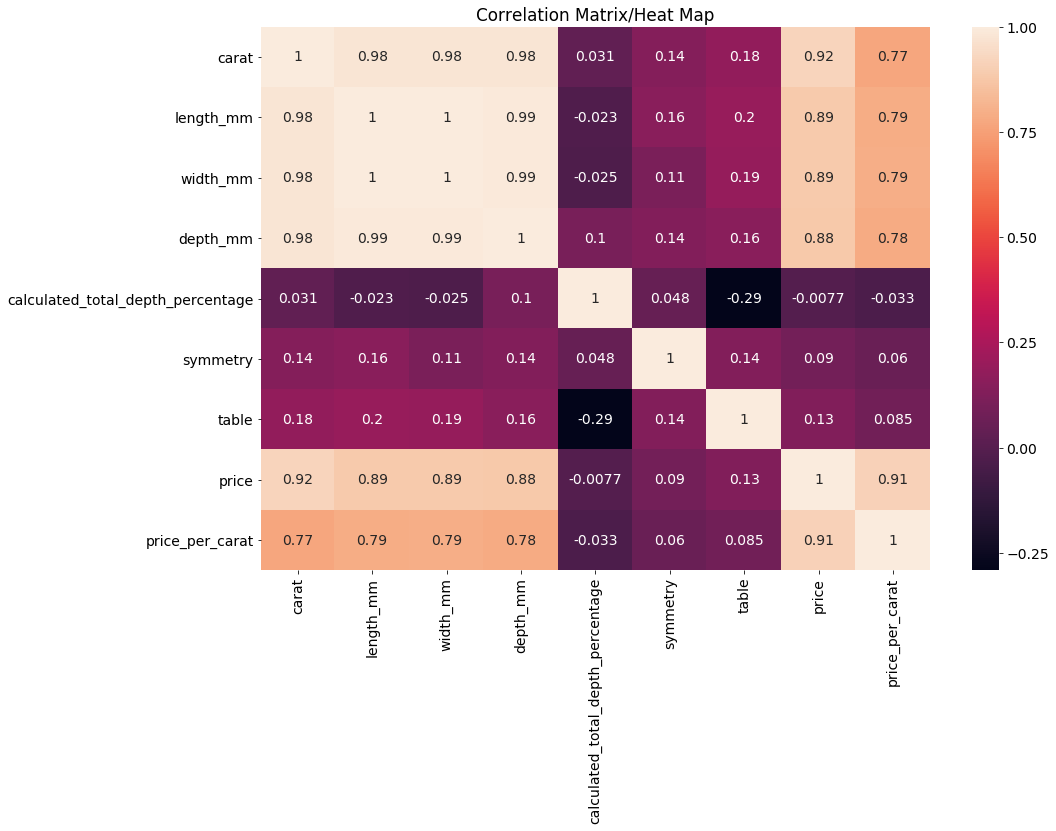

In [23]:
#get correlation matrix and plot it using seaborn

#set figure size
plt.figure(figsize=(15,10)) 

#make a copy of the dataframe and drop the categorical and target variables
corr_df2 = diamonds_minmax_std.copy()
corr_df2.drop(columns = ['cut', 'color', 'clarity'], inplace = True)

#get correlation matrix
corrMatrix2 = corr_df2.corr() 

#graph correlation matrix including numerical and categorical ordinal variables
sns.heatmap(corrMatrix2, annot=True) 
plt.title('Correlation Matrix/Heat Map') 

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

We note that price_per_carat has a strong correlation with price (this is obvious since price_per_carat is derived in part from price), carat, length_mm, width_mm, and depth_mm. Since these variables are so correlated, it seems that by using price_per_carat we could reduce the dimensionality of our neural network. 

Next, we will look at the boxplots of our two new variables, symmetry and price per carat, against the target variable cut.

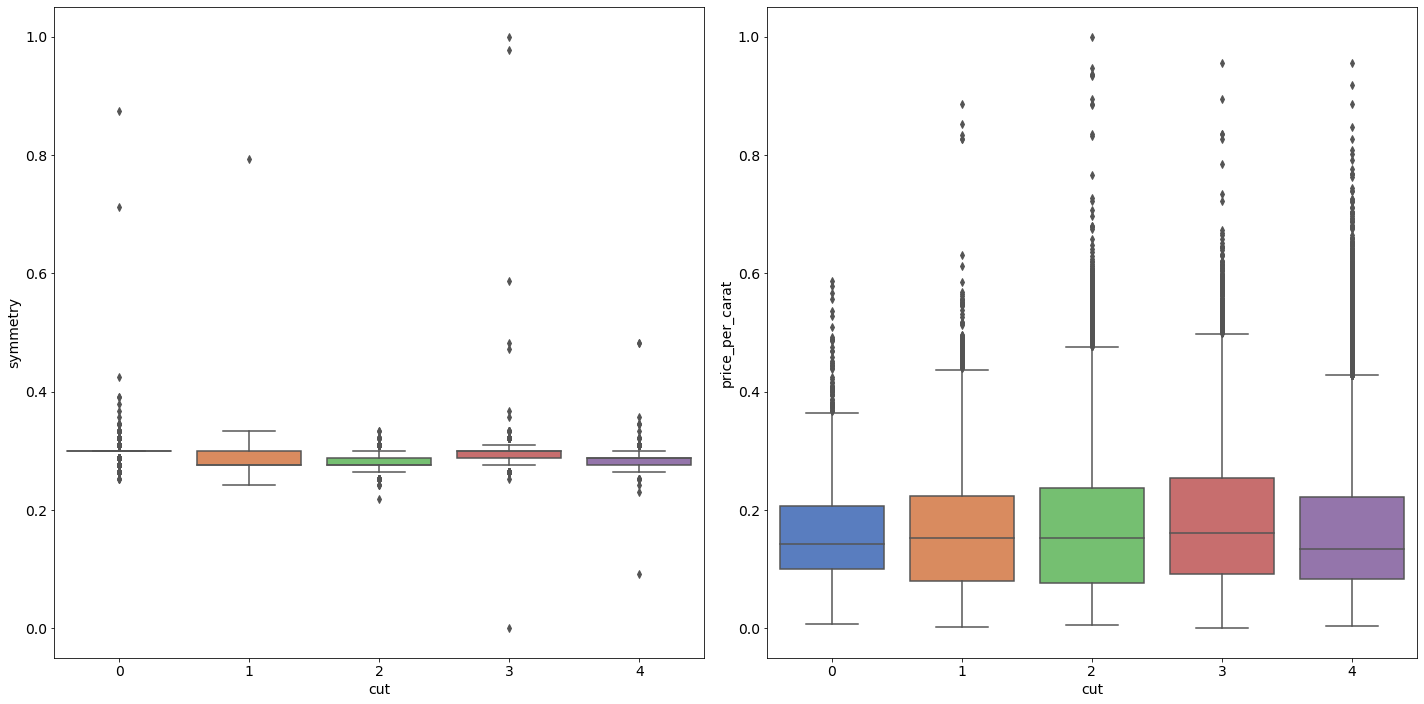

In [24]:
#create a list of the newly created variables
new_variables = ['symmetry', 'price_per_carat']

#set figure size
plt.figure(figsize=(20,10)) 

#use an index to identify the spot of the subplot
j=1
#plot boxplots of the distribution of each of the new variables against the target variable (cut)
for k in diamonds_minmax_std[new_variables]: 
    plt.subplot(1,2,j) 
    sns.boxplot(data=diamonds_minmax_std, x='cut', y=k)
    j=j+1

plt.tight_layout()
#show results    
plt.show()

Based on the boxplots, it appears that both symmetry and price_per_carat may be good predictors for our target variable cut. 

Next we will again check the information gain for our variables. 

In [25]:
#make dict with information gain for each explanatory variable
info_gain2 = dict(zip(diamonds_minmax_std.iloc[:,:-1].columns.to_list(),
                      mutual_info_classif(diamonds_minmax_std.iloc[:,:-1], diamonds_minmax_std.cut, 
                                          discrete_features=True)
                     ))

#create a data frame to display the results and sort them
info_gain_df2 = pd.DataFrame.from_dict(info_gain2, orient='index', columns=['Mutual_Information'])
info_gain_df2 = info_gain_df2.sort_values('Mutual_Information',ascending=False)
info_gain_df2

,Mutual_Information
price,0.483594
price_per_carat,0.395109
calculated_total_depth_percentage,0.356254
table,0.328597
symmetry,0.125592
length_mm,0.121606
width_mm,0.104107
depth_mm,0.086662
carat,0.083444
clarity,0.032115


From above we see that price had the highest information gain value, followed by price_per_carat, calculated_total_depth_percentage, table, and symmetry. This indicates that these may be good predictors.

We will now select which variables we want to include in our neural networks and build the networks.

## Neural Network Modeling 

**Feature Selection**

Based on the findings in our data prep review, we will select the following four variables as predictors in our neural networks:
- price_per_carat
- calculated_total_depth_percentage
- table
- symmetry

While price had a higher information gain value, the information from price is contained within the price_per_carat variable. 

Additionally, since the information on length, width, and depth is encapsulated within the calculated_total_depth_percentage and symmetry variables, we decided to use our calculated column and new feature to reduce dimensionality. 

<br>

**Train / Test Split**  

We will now split the data we will be using in our models into training and testing subsets, and then proceed to construct a decision tree model using these four variables to have as a different type of model for comparison with our neural networks. 

In [26]:
#load train_test_split from scikit learn
from sklearn.model_selection import train_test_split 

x = diamonds_minmax_std[['price_per_carat', 'calculated_total_depth_percentage', 'table', 'symmetry']]
y = diamonds_minmax_std['cut']

#create train and test subsets, use 80% of the data to train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0,stratify=y)

#check shape of train is as expected
x_train.shape

(43131, 4)

### Decision Tree

To have a different type of model for comparison, we will include the decision tree that we created as part of a previous assignment which compared multiple models. As part of that assignment, we selected the decision tree as our model because it was the easiest to understand, computationally inexpensive, and had very similar performance to models which were more sophisticated and more computationally expensive.

Further information about how we chose the hyperparameters for this model can be found in our previous assignment [here](https://github.com/rachelward617/DAV-6150/blob/master/S_Ferrari_M_Vizelman_R_Ward_Project_3.ipynb).

In [27]:
#import DecisionTreeClassifier and accuracy score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#fit model
tree_model = DecisionTreeClassifier(criterion= 'gini', max_depth=9)
tree_model.fit(x_train, y_train)

#generate prediction based on the train set
tree_pred = tree_model.predict(x_train)

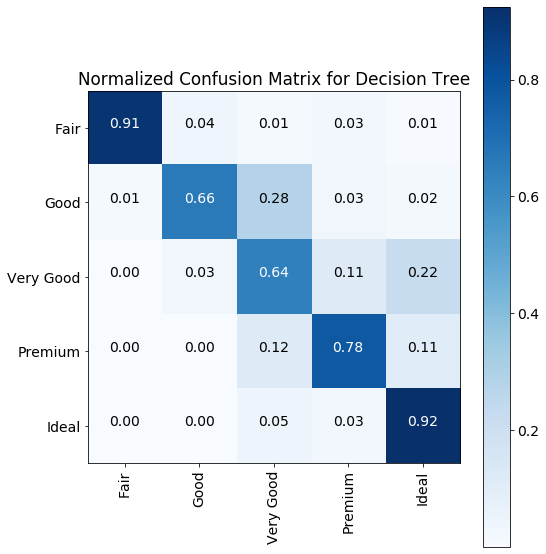

In [28]:
#import necessary modules for calculating and plotting a normalized confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

#make a list of possible classes in the target variable in the order they were encoded.
classes = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

#save the confusion matrix
conf_mat = confusion_matrix(y_train,tree_pred)

#transform the count values into proportions
cm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

#set the plot
fig = plt.figure()
fig.set_size_inches(8, 8)

#plot the matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for Decision Tree')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

#set the colors inside the blocks
fmt = '.2f'
thresh = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
#set the layout
plt.tight_layout()
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#use the metrics from sklearn for a multi-class target 
#evaluate prediction on train set 
accuracy_tree = accuracy_score(y_train, tree_pred)
precision_tree = precision_score(y_train, tree_pred, average='micro')
recall_tree = recall_score(y_train, tree_pred, average='micro')
f1_tree = f1_score(y_train, tree_pred, average='micro')

#print results
print("Evaluation Metrics on the train set for Decision Tree Model")
print("The Accuracy score on the train set is: ", round(accuracy_tree,4))
print("The Precision score on the train set is: ", round(precision_tree,4))
print("The Recall score on the train set is:: ", round(recall_tree,4))
print("The F1 score on the train set is: ", round(f1_tree,4))

Evaluation Metrics on the train set for Decision Tree Model
The Accuracy score on the train set is:  0.7979
The Precision score on the train set is:  0.7979
The Recall score on the train set is::  0.7979
The F1 score on the train set is:  0.7979


In [30]:
#import cross_val_score
from sklearn.model_selection import cross_val_score

#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
cv_res_accuracy_tree = cross_val_score(tree_model, x_train, y_train, cv=5,scoring='accuracy')
cv_res_precision_tree = cross_val_score(tree_model,x_train, y_train, cv=5,scoring='precision_micro')
cv_res_recall_tree = cross_val_score(tree_model,x_train, y_train, cv=5,scoring='recall_micro')
cv_res_f1_tree = cross_val_score(tree_model,x_train, y_train, cv=5,scoring='f1_micro')

#print results
print("Cross validated metrics for Decision Tree Model")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cv_res_accuracy_tree),4))
print("The average Precision score for the 5 folds was: ", round(np.mean(cv_res_precision_tree),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cv_res_recall_tree),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cv_res_f1_tree),4))

Cross validated metrics for Decision Tree Model
The average Accuracy score for the 5 folds was:  0.7856
The average Precision score for the 5 folds was:  0.7856
The average Recall score for the 5 folds was:  0.7855
The average F1 score for the 5 folds was:  0.7857


We see that our model was best at predicting 'Ideal' and 'Fair' values. As expected, the model performed slightly better on the entire training set than in cross-validation. We see that a decision tree was able to accomplish greater than 75% accuracy so we now have a baseline to which we can compare our neural networks. 

### Neural Network #1 

We will now construct our first neural network using the four variables mentioned above. 

First we will split our training dataset into training and validation sets.

In [31]:
#create train and validation subsets, use 90% of the data to train
x_training, x_valid, y_training, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=0,stratify=y_train)

#check shape
x_training.shape

(38817, 4)

In [32]:
#import libraries
import tensorflow as tf
import os
import matplotlib as mpl
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
#from sklearn.model_selection import KFold
#from sklearn.preprocessing import LabelEncoder
#from sklearn.pipeline import Pipeline

In [33]:
# Ignore warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Now that we have imported the necessary libraries, we will create our first neural network. We will start with using one hidden layer, since one hidden layer "can approximate any function that contains a continuous mapping from one finite space to another" per [Heaton Research](https://www.heatonresearch.com/2017/06/01/hidden-layers.html). We will start with 10 neurons in the hidden layer to optimize the training time and prevent overfitting, per the Hands-On Machine Learning ("HOML") textbook, 10 to 100 neurons is typical in a hidden layer. If the performance is not as good as we expect, then we will increase this number in later models.

We opted to use the "ReLU" activation function for the hidden layer as it is simple and fast, and there is a lot of [research](https://stats.stackexchange.com/questions/126238/what-are-the-advantages-of-relu-over-sigmoid-function-in-deep-neural-networks#:~:text=The%20main%20reason%20why%20ReLu,deep%20network%20with%20sigmoid%20activation.) that says that ReLU is the most efficient activation function to use. 

For the output layer, per HOML textbook, since we are doing multi-class classification, we will use a softmax activation function. We also opted to use a sparse categorical cross-entropy loss function per HOML, since we are doing multi-class classification. According to [our research](https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other) this loss function allows us to use a target variable without one-hot encoding.

In [34]:
#define the model as Sequential
model1 = keras.models.Sequential()

#add the input layer with four features as defined above
model1.add(keras.layers.InputLayer(input_shape=[4,]))

#create the hidden layer 
model1.add(keras.layers.Dense(10, activation = "relu"))

#create the output layer with 5 neurons, 1 per class
model1.add(keras.layers.Dense(5, activation = "softmax"))

Now we will compile the model. We decided to use the Adam optimizer because it is fast and efficient, per our [research](https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3). Additionally, the Adam optimizer has a default learning rate of .001, so we will not need to alter the learning rate. We will look at accuracy as our metric of interest because in this case we are most interested in correctly predicting each class and are not overly concerned with either false positives or false negatives. 

In [35]:
#specify the loss function, optimizer, and metrics of interest
model1.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

Now we are ready to fit the model. We will use 200 epochs which we believe will be a good trade-off between efficiency and performance. We will use the default batch size of 32 for our first model. In later models we will adjust the batch size to see how performance is affected. We will also use the validation set we created above to validate our model while fitting.

In [36]:
#fit the model
fit1 = model1.fit(x_training, y_training, epochs = 200, validation_data = (x_valid, y_valid), verbose = 0) 

#save the model
model1.save("first_model.h5")

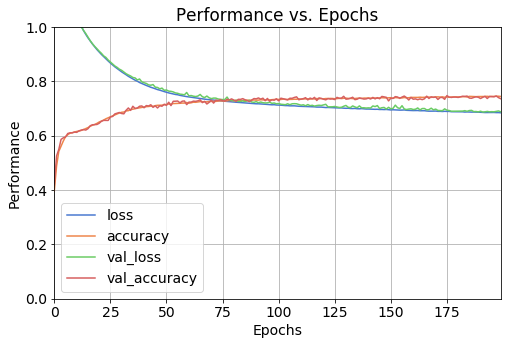

In [37]:
#plot the mean training loss and accuracy over each epoch and mean validation loss and accuracy at the end of each epoch
pd.DataFrame(fit1.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title("Performance vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Performance")
plt.show()

The above plot shows that the accuracy of the training and validating sets was very similar, and that the accuracy continues to improve as the number of epochs increases. We also see that our loss value is very high, which indicates we may be able to improve upon this performance in future networks by adjusting the hyperparameters. 

In [38]:
#evaluate the model using the train set
loss1, acc1 = model1.evaluate(x_train, y_train)

1348/1348 [==============================] - 2s 1ms/step - loss: 0.6864 - accuracy: 0.7383


We see that the accuracy is less than 75%, which is lower than the accuracy of our decision tree model.

In [39]:
#use the model to make predictions
y_pred1 = np.argmax(model1.predict(x_train), axis = -1)
y_pred1

array([2, 2, 4, ..., 4, 4, 1], dtype=int64)

Next, we will evaluate the performance of our first Neural Network. 

We will start by generating a confusion matrix. 
We are following the steps described in this [article](https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a) to plot a normalized version of the confusion matrix. We adopted the code from this [GitHub](https://github.com/javaidnabi31/Multi-class-with-imbalanced-dataset-classification/blob/master/20-news-group-classification.ipynb) page.

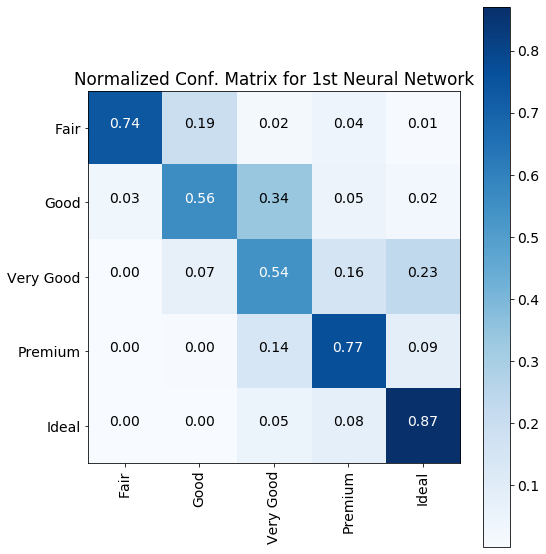

In [40]:
#save the confusion matrix
conf_mat1 = confusion_matrix(y_train,y_pred1)

#transform the count values into proportions
cm1 = conf_mat1.astype('float') / conf_mat1.sum(axis=1)[:, np.newaxis]

#set the plot
fig = plt.figure()
fig.set_size_inches(8, 8)

#plot the matrix
plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Conf. Matrix for 1st Neural Network')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

#set the colors inside the blocks
fmt = '.2f'
thresh = cm1.max() / 2.

for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
        plt.text(j, i, format(cm1[i, j], fmt),horizontalalignment="center",
                 color="white" if cm1[i, j] > thresh else "black")
        
#set the layout
plt.tight_layout()
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

We see that our neural network was best at predicting the "Ideal" cut, which is not surprising as this is the most common cut value. It was worst at classifying "good" and "very good" cuts. Since we have an imbalanced target, we empirically tested the ANN, and the best performance was achieved without balancing the target.

We will now calculate metrics on the train set.

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#use the metrics from sklearn for a multi-class target 
#evaluate prediction on train set 
accuracy1 = accuracy_score(y_train, y_pred1)
precision1 = precision_score(y_train, y_pred1, average='micro')
recall1 = recall_score(y_train, y_pred1, average='micro')
f11 = f1_score(y_train, y_pred1, average='micro')

#print results
print("Evaluation Metrics on the train set for First Neural Network")
print("The Accuracy score on the train set is: ", round(accuracy1,4))
print("The Precision score on the train set is: ", round(precision1,4))
print("The Recall score on the train set is:: ", round(recall1,4))
print("The F1 score on the train set is: ", round(f11,4))
print("The loss for the First Neural Network is:", round(loss1,4))

Evaluation Metrics on the train set for First Neural Network
The Accuracy score on the train set is:  0.7383
The Precision score on the train set is:  0.7383
The Recall score on the train set is::  0.7383
The F1 score on the train set is:  0.7383
The loss for the First Neural Network is: 0.6864


We note that the scores of the different metrics are the same. We made use of a validation subset (a single hold out), since k-fold cross validation would be computationally expensive and time consuming. 

### Second Neural Network

We will now construct our neural network, changing only the batch size to see if this improves performance.  

In [42]:
#define the model as Sequential
model2 = keras.models.Sequential()

#add the input layer with four features as defined above
model2.add(keras.layers.InputLayer(input_shape=[4,]))

#create the hidden layer 
model2.add(keras.layers.Dense(10, activation = "relu"))

#create the output layer with 5 neurons, 1 per class
model2.add(keras.layers.Dense(5, activation = "softmax"))

In [43]:
#specify the loss function, optimizer, and metrics of interest
model2.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

Since we had such a high loss value in our first model, we will now fit the model using a batch size of 10 for this model. Per [this article](https://towardsdatascience.com/guide-to-choosing-hyperparameters-for-your-neural-networks-38244e87dafe) using a smaller batch size results in lower final loss values. 

In [44]:
#fit the model
fit_2 = model2.fit(x_train, y_train, epochs = 200, batch_size = 10, validation_data = (x_valid, y_valid), verbose = 0) 

#save the model
model2.save("second_model.h5")

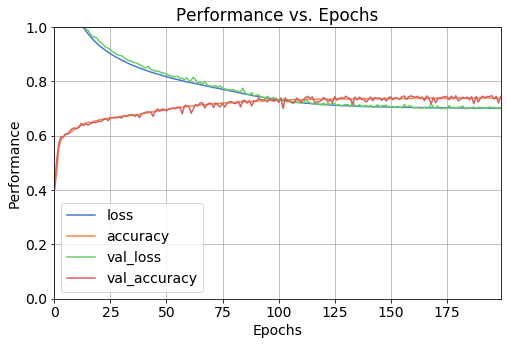

In [45]:
#plot the mean training loss and accuracy over each epoch and mean validation loss and accuracy at the end of each epoch
pd.DataFrame(fit_2.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title("Performance vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Performance")
plt.show()

In [46]:
#use the model to make predictions
y_pred2 = np.argmax(model2.predict(x_train), axis = -1)
y_pred2

array([1, 4, 4, ..., 4, 4, 1], dtype=int64)

In [47]:
#evaluate the model using the training set
loss2, acc2 = model2.evaluate(x_train, y_train)

print("Loss was:", loss2, "and accuracy was:", acc2)

1348/1348 [==============================] - 2s 1ms/step - loss: 0.6979 - accuracy: 0.7439
Loss was: 0.697924792766571 and accuracy was: 0.7439428567886353


Next, we will evaluate the performance of the second neural network.  
We will start by generating a normalized confusion matrix.

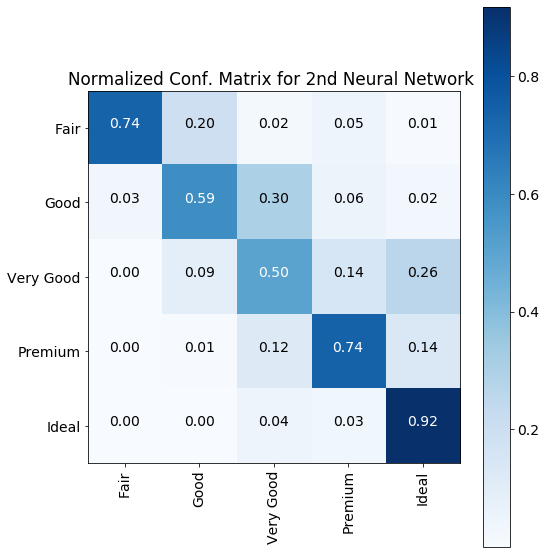

In [48]:
#save the confusion matrix
conf_mat2 = confusion_matrix(y_train,y_pred2)

#transform the count values into proportions
cm2 = conf_mat2.astype('float') / conf_mat2.sum(axis=1)[:, np.newaxis]

#set the plot
fig = plt.figure()
fig.set_size_inches(8, 8)

#plot the matrix
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Conf. Matrix for 2nd Neural Network ')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

#set the colors inside the blocks
fmt = '.2f'
thresh = cm2.max() / 2.

for i, j in itertools.product(range(cm2.shape[0]), range(cm2.shape[1])):
        plt.text(j, i, format(cm2[i, j], fmt),horizontalalignment="center",
                 color="white" if cm2[i, j] > thresh else "black")
        
#set the layout
plt.tight_layout()
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

We see that again our model was best at predicting the 'Ideal' class of cut, and was worst at classifying a cut of 'Very Good'.

In [49]:
#use the metrics from sklearn for a multi-class target 
#evaluate prediction on train set 
accuracy2 = accuracy_score(y_train, y_pred2)
precision2 = precision_score(y_train, y_pred2, average='micro')
recall2 = recall_score(y_train, y_pred2, average='micro')
f12 = f1_score(y_train, y_pred2, average='micro')

#print results
print("Evaluation Metrics on the train set for the Second Neural Network")
print("The balanced Accuracy score for the Second Neural Network is: ", round(accuracy2,4))
print("The Precision score for the Second Neural Network is: ", round(precision2,4))
print("The Recall score for the Second Neural Network is: ", round(recall2,4) )
print("The F1 score for the Second Neural Network is: ", round(f12,4))
print("The loss for the Second Neural Network is:", round(loss2,4))

Evaluation Metrics on the train set for the Second Neural Network
The balanced Accuracy score for the Second Neural Network is:  0.7439
The Precision score for the Second Neural Network is:  0.7439
The Recall score for the Second Neural Network is:  0.7439
The F1 score for the Second Neural Network is:  0.7439
The loss for the Second Neural Network is: 0.6979


We see that the accuracy score for this model is close to 75% and that the loss is lower than the accuracy. 

### Third Neural Network

For the third neural network, we will use the same batch size as the second neural network, and we will add another hidden layer, since we don't know if our data is completely linearly separable.

For the second hidden layer we will use 6 neurons, since the number of neurons in hidden layers should decrease with each added layer.

In [50]:
#define the model as Sequential
model3 = keras.models.Sequential()

#add the input layer with four features as defined above
model3.add(keras.layers.InputLayer(input_shape=[4,]))

#create the hidden layer 
model3.add(keras.layers.Dense(10, activation = "relu"))

#create another hidden layer with fewer neurons
model3.add(keras.layers.Dense(6, activation = "relu"))

#create the output layer with 5 neurons, 1 per class
model3.add(keras.layers.Dense(5, activation = "softmax"))

In [51]:
#specify the loss function, optimizer, and metrics of interest
model3.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [52]:
#fit the model
fit_3 = model3.fit(x_train, y_train, epochs = 200, batch_size = 10, validation_data = (x_valid, y_valid), verbose = 0) 

#save the model
model3.save("third_model.h5")

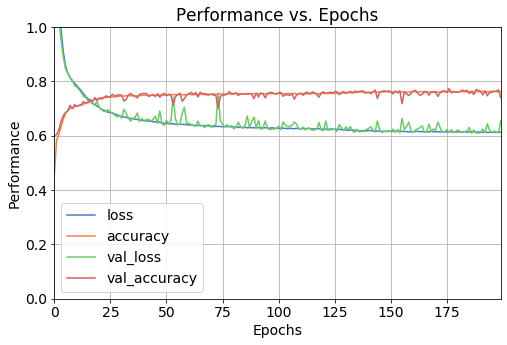

In [53]:
#plot the mean training loss and accuracy over each epoch and mean validation loss and accuracy at the end of each epoch
pd.DataFrame(fit_3.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title("Performance vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Performance")
plt.show()

In [54]:
#use the model to make predictions
y_pred3 = np.argmax(model3.predict(x_train), axis = -1)
y_pred3

array([2, 2, 4, ..., 4, 4, 1], dtype=int64)

In [55]:
#evaluate the model using the training set
loss3, acc3 = model3.evaluate(x_train, y_train)

1348/1348 [==============================] - 2s 1ms/step - loss: 0.6492 - accuracy: 0.7425


Next, we will evaluate the performance of the third Neural Network.  
We will start by generating a normalized confusion matrix, then calculate performance metrics of the model when applied to the training set.

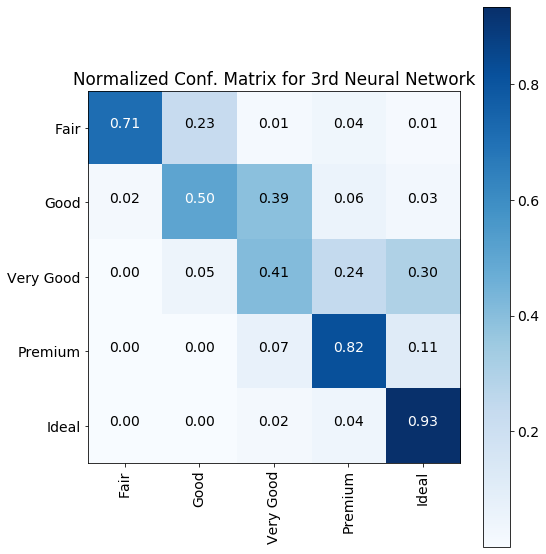

In [56]:
#save the confusion matrix
conf_mat3 = confusion_matrix(y_train,y_pred3)

#transform the count values into proportions
cm3 = conf_mat3.astype('float') / conf_mat3.sum(axis=1)[:, np.newaxis]

#set the plot
fig = plt.figure()
fig.set_size_inches(8, 8)

#plot the matrix
plt.imshow(cm3, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Conf. Matrix for 3rd Neural Network')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

#set the colors inside the blocks
fmt = '.2f'
thresh = cm3.max() / 2.

for i, j in itertools.product(range(cm3.shape[0]), range(cm3.shape[1])):
        plt.text(j, i, format(cm3[i, j], fmt),horizontalalignment="center",
                 color="white" if cm3[i, j] > thresh else "black")
        
#set the layout
plt.tight_layout()
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [57]:
#use the metrics from sklearn for a multi-class target 
#evaluate prediction on train set 
accuracy3 = accuracy_score(y_train, y_pred3)
precision3 = precision_score(y_train, y_pred3, average='micro')
recall3 = recall_score(y_train, y_pred3, average='micro')
f13 = f1_score(y_train, y_pred3, average='micro')

#print results
print("Evaluation Metrics on the train set for Third Neural Network")
print("The Accuracy score for the Third Neural Network is: ", round(accuracy3,4))
print("The Precision score for the Third Neural Network is: ", round(precision3,4))
print("The Recall score for the Third Neural Network is: ", round(recall3,4) )
print("The F1 score for the Third Neural Network is: ", round(f13,4))
print("The loss for the Third Neural Network is:", round(loss3,4))

Evaluation Metrics on the train set for Third Neural Network
The Accuracy score for the Third Neural Network is:  0.7425
The Precision score for the Third Neural Network is:  0.7425
The Recall score for the Third Neural Network is:  0.7425
The F1 score for the Third Neural Network is:  0.7425
The loss for the Third Neural Network is: 0.6492


We see that the loss has improved and that the accuracy is close to 75%. 

## Select Models 

We will now compare the performance of all the neural networks that we generated above.  
We will then apply our preferred model to the testing set, and evaluate the performance.

In [58]:
#summary of comparison between models
summary_df = pd.DataFrame(np.array([['4',
                                     round(np.mean(accuracy_tree),4),
                                     round(np.mean(precision_tree),4),
                                     round(np.mean(recall_tree),4),                                     
                                     round(np.mean(f1_tree),4),
                                     'N/A'
                                     ],
                                    ['4',
                                     round(accuracy1,4),
                                     round(precision1,4),
                                     round(recall1,4),                                     
                                     round(f11,4),
                                     round(loss1,4)
                                     ],
                                    ['4',
                                     round(accuracy2,4),
                                     round(precision2,4),
                                     round(recall2,4),                                     
                                     round(f12,4),
                                     round(loss2,4)
                                     ],
                                    ['4',
                                     round(accuracy3,4),
                                     round(precision3,4),
                                     round(recall3,4),                                     
                                     round(f13,4),
                                     round(loss3,4)
                                     ],
                                   ]),
                          columns=['Variables in Model','Accuracy',
                                   'Precision', 'Recall', 'F1', 'Loss'],
                          index=['Decision Tree', 'First Neural Network',
                                 'Second Neural Network',
                                 'Third Neural Network'])

#print results
summary_df

,Variables in Model,Accuracy,Precision,Recall,F1,Loss
Decision Tree,4,0.7979,0.7979,0.7979,0.7979,N/A
First Neural Network,4,0.7383,0.7383,0.7383,0.7383,0.6864
Second Neural Network,4,0.7439,0.7439,0.7439,0.7439,0.6979
Third Neural Network,4,0.7425,0.7425,0.7425,0.7425,0.6492


Since each of our models has the same number of variables, and we are required to select a neural network for the assignment, we select the third neural network to use as it has close to the highest accuracy as well as the lowest loss value.

We will now apply our preferred model to the test data, generate a confusion matrix, and calculate performance metrics

In [59]:
#generate prediction based on the test set
#use the model to make predictions
test_pred = np.argmax(model3.predict(x_test), axis = -1)
test_pred

array([3, 4, 4, ..., 2, 3, 4], dtype=int64)

In [60]:
#evaluate the model and get the loss
loss_test, acc_test = model3.evaluate(x_test,y_test)

337/337 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.7452


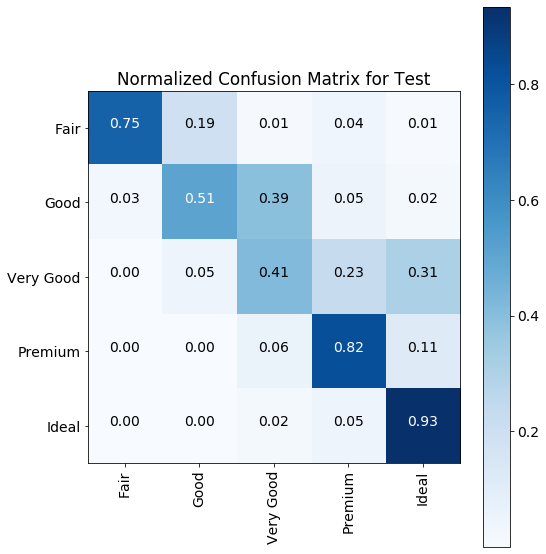

In [61]:
#save the confusion matrix
conf_mat4 = confusion_matrix(y_test, test_pred)

#transform the count values into proportions
cm4 = conf_mat4.astype('float') / conf_mat4.sum(axis=1)[:, np.newaxis]

#set the plot
fig = plt.figure()
fig.set_size_inches(8, 8)

#plot the matrix
plt.imshow(cm4, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for Test')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

#set the colors inside the blocks
fmt = '.2f'
thresh = cm4.max() / 2.

for i, j in itertools.product(range(cm4.shape[0]), range(cm4.shape[1])):
        plt.text(j, i, format(cm4[i, j], fmt),horizontalalignment="center",
                 color="white" if cm4[i, j] > thresh else "black")
        
#set the layout
plt.tight_layout()
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [62]:
#use the metrics from sklearn for a multi-class target
accuracy_test = accuracy_score(y_test, test_pred)
precision_test = precision_score(y_test, test_pred, average='micro')
recall_test = recall_score(y_test, test_pred, average='micro')
f1_test = f1_score(y_test, test_pred, average='micro')

#print results
print("Evaluation Metrics on the Test")
print("The Accuracy score for the Test is: ", round(accuracy_test,4))
print("The Precision score for the Test is: ", round(precision_test,4))
print("The Recall score for the Test is: ", round(recall_test,4) )
print("The F1 score for the Test is: ", round(f1_test,4))
print("The Loss for the Test is: ", round(loss_test,4))

Evaluation Metrics on the Test
The Accuracy score for the Test is:  0.7452
The Precision score for the Test is:  0.7452
The Recall score for the Test is:  0.7452
The F1 score for the Test is:  0.7452
The Loss for the Test is:  0.6572


In [63]:
#summary of comparison between models and Test set
summary_df_test = pd.DataFrame(np.array([['4',
                                         round(np.mean(accuracy_tree),4),
                                         round(np.mean(precision_tree),4),
                                         round(np.mean(recall_tree),4),                                     
                                         round(np.mean(f1_tree),4),
                                        'N/A'
                                         ],
                                        ['4',
                                         round(accuracy1,4),
                                         round(precision1,4),
                                         round(recall1,4),                                     
                                         round(f11,4),
                                         round(loss1,4)
                                         ],
                                        ['4',
                                         round(accuracy2,4),
                                         round(precision2,4),
                                         round(recall2,4),                                     
                                         round(f12,4),
                                         round(loss2,4)
                                         ],
                                        ['4',
                                         round(accuracy3,4),
                                         round(precision3,4),
                                         round(recall3,4),                                     
                                         round(f13,4),
                                         round(loss3,4)
                                         ],
                                        ['4',
                                         round(accuracy_test,4),
                                         round(precision_test,4),
                                         round(recall_test,4),                                     
                                         round(f1_test,4),
                                         round(loss_test,4)
                                         ]
                                       ]),
                                    
                          columns=['Variables in Model','Accuracy',
                                   'Precision', 'Recall', 'F1', 'Loss'],
                          index=['Decision Tree', 'First Neural Network',
                                 'Second Neural Network',
                                 'Third Neural Network', 'Test Neural Network'])

#print results
summary_df_test

,Variables in Model,Accuracy,Precision,Recall,F1,Loss
Decision Tree,4,0.7979,0.7979,0.7979,0.7979,N/A
First Neural Network,4,0.7383,0.7383,0.7383,0.7383,0.6864
Second Neural Network,4,0.7439,0.7439,0.7439,0.7439,0.6979
Third Neural Network,4,0.7425,0.7425,0.7425,0.7425,0.6492
Test Neural Network,4,0.7452,0.7452,0.7452,0.7452,0.6572


We note that the results of the model applied to our Test data are better than the scores of the model when applied to the entire training set (excluding the loss, which was higher meaning a poorer result). This is a great result and means that our model generalized well to previously unseen data.

## Conclusions

 We constructed 4 different models to estimate the Cut of a diamond.

- a Decision Tree 
- a Neural Network with 1 hidden layer and a batch size of 32
- a Neural Network with 1 hidden layer and a batch size of 10
- a Neural Network with 2 hidden layers and a batch size of 10

Between the models, the Decision Tree had the best performance. However, we were required to pick a neural network for this assignment. The neural network with the poorest performance was the first Neural Network. This is unsurprising as we used only one hidden layer, and used the default batch size. After decreasing the batch size for the second Neural Network, the performance of the model improved in accuracy. We chose to use the third model as it had the best loss value and the accuracy was only marginally lower.  The results after applying the third model to the test set indicate that our model generalized well. 

Although it was not part of the assignment, given the option, we would choose to use a Decision Tree over a Neural Network to classify the Cut of a diamond for this dataset. Decision Tree models are much easier to understand, computationally inexpensive, and in this instance, had superior performance.